In [1]:
### Import Statements ###

# Graphs section


# Imports for wordcloud

# from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Python spellchecker
# !pip install pyspellchecker
# from spellchecker import SpellChecker
# import string
# Textblob -> Taken from tina's notebook mentioned above :o)
# !pip install TextBlob
from textblob import TextBlob
from textblob import Word


from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import StringCategoryCorpusReader
import nltk



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. p£d.read_csv)


import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import display, HTML



%run tina-kenjee-comments-nlp-script.ipynb
test_func()

You should consider upgrading via the 'c:\users\pascal\anaconda3\python.exe -m pip install --upgrade pip' command.


all done?!
it works!! :o)


### First we"ll upload the files into their own pandas each and do some processing like getting lemma
### please note that I ran a spell checker in another notebooks it takes a lot of time! :O

In [2]:
# # read the  ORIGINAL files
data_tina = pd.read_csv('tinas_comments.csv')
data_kenjee = pd.read_csv('kens_comments.csv')

In [3]:
data_tina.describe(include='all')

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,vidid,total_reply_counts,vid_title,just_date
count,513.000000,513,513,513,513,513.000000,513.000000,513,513,513.000000,513,513
unique,NaN,511,513,289,289,NaN,NaN,513,30,NaN,30,112
top,NaN,🔥🔥,Ugxg-xkEBQoJmE9PgiB4AaABAg,http://www.youtube.com/channel/UC2UXDak6o7rBm2...,Tina Huang,NaN,NaN,2020-09-13 15:50:21+00:00,lCi6fWuI8r4,NaN,A day in the life of a data scientist (FAANG d...,2020-10-14
freq,NaN,2,1,26,26,NaN,NaN,1,41,NaN,41,18
mean,256.000000,NaN,NaN,NaN,NaN,1.352827,0.645224,NaN,NaN,1.352827,NaN,NaN
std,148.234611,NaN,NaN,NaN,NaN,0.963330,1.438472,NaN,NaN,0.963330,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,128.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,1.000000,NaN,NaN
50%,256.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,1.000000,NaN,NaN
75%,384.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN


In [4]:
data_kenjee.describe(include='all')

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,vidid,total_reply_counts,vid_title,just_date
count,5828.000000,5828,5828,5828,5828,5828.000000,5828.000000,5828,5828,5828.000000,5828,5828
unique,NaN,5769,5828,3635,3621,NaN,NaN,5826,166,NaN,166,469
top,NaN,I like it!,UgzkmI5Wo1nZ9NbkSd54AaABAg,http://www.youtube.com/channel/UCiT9RITQ9PW6Bh...,Ken Jee,NaN,NaN,2020-07-24 15:08:47+00:00,4OZip0cgOho,NaN,How I Would Learn Data Science (If I Had to St...,2020-07-24
freq,NaN,12,1,105,105,NaN,NaN,2,606,NaN,606,105
mean,2913.500000,NaN,NaN,NaN,NaN,1.334077,2.153569,NaN,NaN,1.334077,NaN,NaN
std,1682.543016,NaN,NaN,NaN,NaN,1.042643,6.620788,NaN,NaN,1.042643,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,1456.750000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN
50%,2913.500000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN
75%,4370.250000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,2.000000,NaN,NaN


#### first thing first, there seems to be a few missing things in the comment columns, but too small for it to really impact.
#### We can also see that for kenjee and tina, they have 'fans' -> people who post more than once. In fact, i do not see really lots of replies, we'll come back to this later.

## 1. Process the comment row for correction, removal of emoji and stopwords/ lemmatization among other things

In [6]:
data_kenjee_corr = data_kenjee
data_kenjee_corr['clean_comment'] = data_kenjee['comment'].map(processRow)
data_kenjee_corr['clean_comment'][1]

'hard dilemma graduated data analyst internship wished data scientist internship top college guessing best route land data analyst role work way data scientist position gain domain real world experience working data working project added portfolio'

In [8]:
data_tina_corr = data_tina
data_tina_corr['clean_comment'] = data_tina_corr['comment'].map(processRow)
data_tina_corr['clean_comment'][1]

'private method earn day'

## 2. Hello "sir" ken jee :P

#### Now, I disintcly remember Kenjee feeling uneasy by people calling him 'sir'. Let's see what we can discover about that shall we? I have an idea why :o)

#### First thing first, let's check which posts us thte word "sir"

In [9]:
helloSirKenJee = data_kenjee_corr[data_kenjee_corr['comment'].str.contains('sir')]
ILikesayingSir = helloSirKenJee[['author_name','comment']].groupby('author_name').agg(np.count_nonzero)
ILikesayingSir.sort_values(by='comment',ascending=False)[:30]


,comment
author_name,
Muhammad Hashir,12
IMPOSSIBLE THINGS,4
Mr. Suraj Viswakarma,3
Lori Zhuka,3
Harshita Chaurasia,3
sagar mestry,2
karan mehta,2
Teju Teju,1
PRAMUDYA KAMAL JUMBLAT,1


##### Did you notice? A lot of those people comes from places like india and middle east. And only two of them have repeatedly done it.

#### I was lucky to work in international environment before including people from those countires and, for them, using 'sir' is common and a mark of respect. The easiest thing to do is to give a warm thank you and accept that, now and then, people will call you sir.
##### also, I am wondering if "Sir Kenjee" cups and stuff might be a good thing for merchandises ;)

#### Now let's go back to more run of the mill stuff  --> A WORD CLOUD !!! ( or several ;o) )


Is none


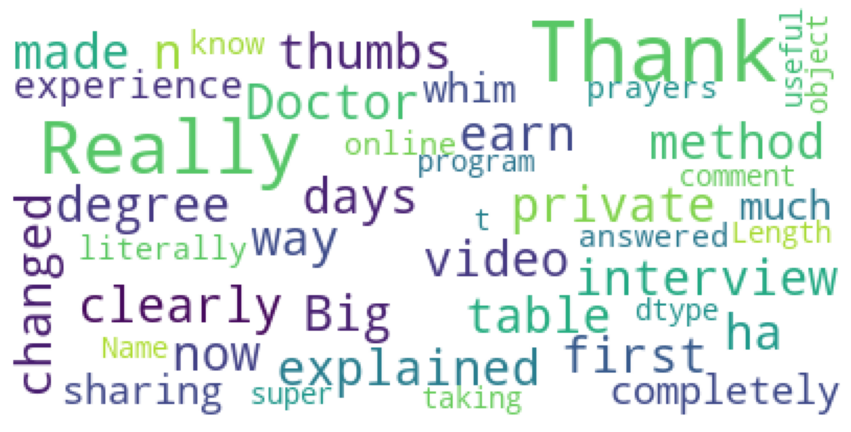

In [11]:
# First, let's start with tina
print_wordcloud(data_tina_corr['comment'])


In [ ]:
# A bit messy, but interview is, without suprise, one of the most noted words

Is none


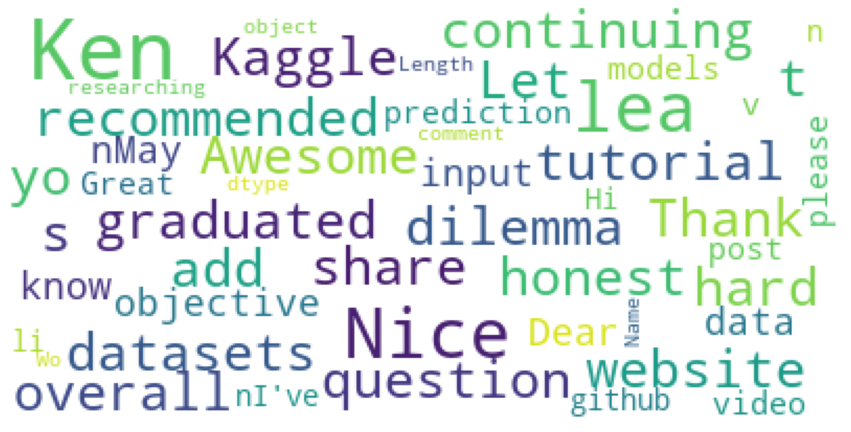

In [12]:
# and now kenjee
print_wordcloud(data_kenjee_corr['comment'])

#### Both are getting a lot of thank you, which is normal AND deserved since they bring a lot of valuable info for ML.

#### It woul require some more cleaning on my part but words like Kaggle or technical ones in general appears much more on kenjee side.
#### And fot tina thre are a few about the interview process ... so nothing new there alas, still need to work for this :O

#### that being said, it would help if we remove so as to keep only the entities we need ( spacy should help there)
#### We'll do a frequencies count to double check

In [10]:
get_fequencies(data_kenjee_corr['clean_comment'])[0:30]


[('data', 2747),
 ('video', 1894),
 ('science', 1738),
 ('ken', 1671),
 ('thanks', 1141),
 ('great', 889),
 ('like', 868),
 ('project', 836),
 ('would', 811),
 ('thank', 795),
 ('really', 741),
 ('learning', 722),
 ('get', 658),
 ('good', 619),
 ('one', 574),
 ('work', 570),
 ('job', 504),
 ('much', 489),
 ('course', 479),
 ('hi', 477),
 ('know', 468),
 ('learn', 456),
 ('also', 444),
 ('time', 442),
 ('help', 409),
 ('hey', 403),
 ('think', 401),
 ('lot', 398),
 ('want', 395),
 ('please', 390)]

In [11]:
get_fequencies(data_tina_corr['clean_comment'])[0:30]

[('video', 184),
 ('data', 159),
 ('tina', 119),
 ('thanks', 83),
 ('science', 82),
 ('thank', 72),
 ('really', 71),
 ('great', 71),
 ('question', 69),
 ('like', 68),
 ('interview', 64),
 ('would', 63),
 ('sql', 55),
 ('also', 52),
 ('much', 52),
 ('helpful', 51),
 ('get', 47),
 ('love', 45),
 ('know', 42),
 ('hi', 40),
 ('project', 40),
 ('one', 39),
 ('job', 38),
 ('good', 37),
 ('think', 36),
 ('d', 35),
 ('awesome', 35),
 ('content', 34),
 ('scientist', 34),
 ('make', 33)]

In [12]:
# Not much more information when done like this alas :( 
# Now, let's do entities for practice ( did not find yet a way to prooperly use them, would need a list of possible entities types)


In [13]:

import spacy
nlp = spacy.load("en_core_web_sm")

C:\Users\Pascal\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\Pascal\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [14]:


def explain_text_entities(data):
    
    temp  = concat_all_text(data)
    doc = nlp(temp)
    entities = []
    
#     ent_pd = []
    
#     for ent in doc.ents:
#         ent_pd.append[ent.text, ent.start_char, ent.end_char, ent.label_]
#         print(ent.text, ent.start_char, ent.end_char, ent.label_)
    
    
    for ent in doc.ents:
        entities.append([ent.text, ent.start_char, ent.end_char, ent.label_])
#         entities.extend([{ent}, {ent.label_}, {spacy.explain(ent.label_)}])
#         entities.extend(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
#         print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
    return entities

ken_ent = explain_text_entities(data_kenjee_corr['clean_comment'])
ken_ent

[['kaggle', 0, 6, 'ORG'],
 ['second', 2073, 2079, 'ORDINAL'],
 ['zero', 2263, 2267, 'CARDINAL'],
 ['one', 2544, 2547, 'CARDINAL'],
 ['uyte cs', 2899, 2906, 'PERSON'],
 ['february fall', 3417, 3430, 'DATE'],
 ['gre', 3520, 3523, 'ORG'],
 ['gpa', 3569, 3572, 'ORG'],
 ['ken yay', 4179, 4186, 'PERSON'],
 ['eastern university pa', 5089, 5110, 'ORG'],
 ['huang ken', 5210, 5219, 'PERSON'],
 ['charlie brown', 5237, 5250, 'PERSON'],
 ['next year', 5704, 5713, 'DATE'],
 ['london', 6853, 6859, 'GPE'],
 ['uk', 7494, 7496, 'GPE'],
 ['one', 8417, 8420, 'CARDINAL'],
 ['kaggle', 8496, 8502, 'PRODUCT'],
 ['one', 8524, 8527, 'CARDINAL'],
 ['first', 8695, 8700, 'ORDINAL'],
 ['six month ago', 8794, 8807, 'DATE'],
 ['year ago', 9167, 9175, 'DATE'],
 ['zero', 9235, 9239, 'CARDINAL'],
 ['chicago', 9536, 9543, 'GPE'],
 ['kaggle', 9602, 9608, 'PERSON'],
 ['one', 11934, 11937, 'CARDINAL'],
 ['one', 11963, 11966, 'CARDINAL'],
 ['second', 12141, 12147, 'ORDINAL'],
 ['week like month christmas', 12174, 12199, 'DAT

In [15]:
tina_ent = explain_text_entities(data_tina_corr['clean_comment'])

In [17]:
tina_ent

[['one', 854, 857, 'CARDINAL'],
 ['one', 1083, 1086, 'CARDINAL'],
 ['pdf', 1676, 1679, 'ORG'],
 ['one', 2484, 2487, 'CARDINAL'],
 ['canada', 2573, 2579, 'GPE'],
 ['waterloo uoft', 2592, 2605, 'PERSON'],
 ['year', 2761, 2765, 'DATE'],
 ['u canada china', 2790, 2804, 'ORG'],
 ['drw hudson river', 2872, 2888, 'PERSON'],
 ['morgan stanley hsbc goldman canadian bank', 2904, 2945, 'ORG'],
 ['tesla bloomberg microsoft', 3078, 3103, 'PERSON'],
 ['darwin', 3104, 3110, 'PERSON'],
 ['austin toronto', 3149, 3163, 'PERSON'],
 ['first', 3630, 3635, 'ORDINAL'],
 ['india', 4640, 4645, 'GPE'],
 ['one', 4893, 4896, 'CARDINAL'],
 ['engineering year', 5106, 5122, 'DATE'],
 ['first', 5473, 5478, 'ORDINAL'],
 ['cse', 5567, 5570, 'ORG'],
 ['sunday', 6733, 6739, 'DATE'],
 ['linkedin', 6812, 6820, 'ORG'],
 ['focus java school', 7315, 7332, 'ORG'],
 ['u canadian university deadline submit project college', 7898, 7951, 'ORG'],
 ['month ago', 8314, 8323, 'DATE'],
 ['hahaha', 8441, 8447, 'NORP'],
 ['san jose', 864

#### Let's save what we have so far, got a small laptop and NLP can be greedy in resources.

### 3. Check by authors of comments

In [19]:
# Importing library
import csv
  
# opening the csv file in 'w+' mode
file = open('tina_ents.csv', 'w+', newline ='')
  
# writing the data into the file
with file:    
    write = csv.writer(file)
    write.writerows(tina_ent)

# opening the csv file in 'w+' mode
file = open('kenjee_ents.csv', 'w+', newline ='')    

# writing the data into the file
with file:    
    write = csv.writer(file)
    write.writerows(ken_ent)

In [20]:
tina_followers  = data_tina_corr[['author_name','total_reply_counts']].groupby('author_name')
tina_core_discuss = tina_followers.agg(np.sum)
tina_core_discuss = tina_core_discuss.sort_values(by="total_reply_counts",ascending = False)
tina_core_discuss[:30]

,total_reply_counts
author_name,
Tina Huang,32
Boris Giba,30
Michael,21
Data Professor,18
Ken Jee,16
Mrv Trgt,14
ravi tanwar,14
Andrew Mo – Six Figure Dream Job,14
Rachel Castellino,13


In [21]:
ken_followers  = data_kenjee_corr[['author_name','total_reply_counts']].groupby('author_name')
ken_core_discuss = ken_followers.agg(np.sum)
ken_core_discuss = ken_core_discuss.sort_values(by="total_reply_counts",ascending = False)
ken_core_discuss[:30]

,total_reply_counts
author_name,
Ken Jee,156
Data Professor,103
Boris Giba,64
Import Data,54
Ray Ojel,49
Lewi Uberg,48
Muhammad Hashir,47
Mario,43
Valery Salov,40


#### so on both channel, the creator is the one making the most replies to their posts, logical but still, it's there/ . We can also see how kenjee, tina but also andrew - six figure job posts on their peers youtube channel :)  I am glad I am part of the best 30 on kenjee :P

### It gives me ideas for s-what to suggest later, let's keep going on.

#### please note that the 'i like say sir 'Miuhammad HAshir is part of it. He's not just respectful he's a big part of the discussion on your chanel. Honestly, send him a cup courtesy of "sir kenjee" ;)

In [24]:
# data_kenjee['like_count'].sum()/len(data_kenjee)

In [25]:
data_kenjee['like_count'].sum()/len(data_kenjee)

2.1535689773507207

In [26]:
data_tina['like_count'].sum()/len(data_tina)

0.645224171539961

#### Kenjee has a bigget youtube channel, that woud explain the higher post mades per videos

### 4. The swear-o-meter
#### that's right, we're going to check for foul language :O 
#### I can't remember where, but  htere is a github with a simple file of all the words and variaation flagged by google.

In [28]:
swear_words = pd.read_csv('list_swear.txt', delimiter = "\n")
swear_words_set = set(swear_words['4r5e'])
swear_words_set.add('4r5e')

def swear_o_meter_detection(row):
    swear_o_meter=0
#     print(row)
    text = row.split()
    for i in text:
        if i in swear_words_set:
            swear_o_meter += 1
    
    return swear_o_meter


In [29]:
data_kenjee_corr["swear-o-meter"] = data_kenjee_corr['clean_comment'].map(swear_o_meter_detection)
data_kenjee_corr["swear-o-meter"].unique()

array([0, 1, 4], dtype=int64)

In [30]:
data_tina_corr["swear-o-meter"] = data_tina_corr['clean_comment'].map(swear_o_meter_detection)
data_tina_corr["swear-o-meter"].unique()

array([0, 1], dtype=int64)

In [31]:
kenjee_impolite = data_kenjee_corr[data_kenjee_corr["swear-o-meter"] > 0]
(len(kenjee_impolite) / len(data_kenjee_corr) *100)

0.7206588881262869

In [34]:
tina_impolite = data_tina_corr[data_tina_corr["swear-o-meter"] > 0]
(len(tina_impolite) / len(data_tina_corr) *100)

0.5847953216374269

#### less than one small percent for each, we ML people are remarkably well educated :o)

In [35]:
print(len(kenjee_impolite) )
print(len(data_kenjee_corr) )

42
5828


In [30]:
# now the same but for tina
tina_impolite = data_tina_corr[data_tina_corr["swear-o-meter"] > 0]
(len(tina_impolite) / len(data_tina_corr) )*100

0.5847953216374269

In [31]:
print(len(tina_impolite) )
print(len(data_tina_corr) )

3
513


In [32]:
len(data_tina_corr)

513

#### There's even less curse words at tina's. But it's very visible that she has decent followers just by her youtube live study videios :o)

#### Dark vader enters the scene .... euh ... vader sentiment. I intent to use that to create features for a k means later on.. It did good on the debate dataset earlier for me :)

In [36]:
### Vader sentiment analysis -> feature creation 

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(data_tina_corr.comment[0])

{'neg': 0.028, 'neu': 0.802, 'pos': 0.17, 'compound': 0.9073}

In [38]:
data_tina_corr['vader_polarity'] = data_tina_corr['clean_comment'].map(sentiment.polarity_scores)
data_kenjee_corr['vader_polarity'] = data_kenjee_corr['clean_comment'].map(sentiment.polarity_scores)

In [39]:
data_tina_corr['vader_neg_sentiment'] = data_tina_corr.vader_polarity.map(lambda x: x['neg'])
data_tina_corr['vader_pos_sentiment'] = data_tina_corr.vader_polarity.map(lambda x: x['pos'])
data_tina_corr['vader_neu_sentiment'] = data_tina_corr.vader_polarity.map(lambda x: x['neu'])
data_tina_corr['vader_compound_sentiment'] = data_tina_corr.vader_polarity.map(lambda x: x['compound'])

In [40]:
data_kenjee_corr['vader_neg_sentiment'] = data_kenjee_corr.vader_polarity.map(lambda x: x['neg'])
data_kenjee_corr['vader_pos_sentiment'] = data_kenjee_corr.vader_polarity.map(lambda x: x['pos'])
data_kenjee_corr['vader_neu_sentiment'] = data_kenjee_corr.vader_polarity.map(lambda x: x['neu'])
data_kenjee_corr['vader_compound_sentiment'] = data_kenjee_corr.vader_polarity.map(lambda x: x['compound'])

In [41]:
data_tina_corr.sort_values(by=['vader_compound_sentiment'], ascending=False)[['comment','vader_compound_sentiment']].head(20)

,comment,vader_compound_sentiment
166,"nice interview, Tina, thanks for setting this ...",0.9880
300,I'm a prospective candidate for MCIT at the Un...,0.9842
270,"As always, I would love to see your solutions!...",0.9833
449,Arvind's post about MCIT Online vs. On Campus:...,0.9831
152,WoW today seems to be my lucky day. I discover...,0.9816
452,I spent so much time thinking about this!\nFor...,0.9808
288,Data Professor is incredibly knowledgeable and...,0.9804
510,You have literally answered my prayers! Thank ...,0.9801
426,Btw I still HIGHLY recommend you get a whitebo...,0.9790
435,Hey I saw your Interview with Ken. Your Ideas ...,0.9783


In [42]:
data_kenjee_corr.sort_values(by=['vader_compound_sentiment'], ascending=False)[['comment','vader_compound_sentiment']].head(20)

,comment,vader_compound_sentiment
3540,Nice video! I'm not familiar with your channel...,0.9989
3011,I found this video to be extremely basic and v...,0.9984
2691,"Thanks Ken for this amazing podcast, really en...",0.9966
2212,"Thank you for this informative video Sir, this...",0.9962
1254,I swear some of the things you said reminded o...,0.9961
5583,Great resolutions! Some of my comments:\n1) Ni...,0.9958
156,Oh man! What an excellent and beautiful video!...,0.9957
2204,"This is a very important topic, I agree!\nAs y...",0.9954
199,You're really starting to get the hang of this...,0.9947
5033,"Hey Ken,\n(warning: longer comment incoming)\n...",0.9944


In [43]:
print(data_kenjee_corr['vader_compound_sentiment'].mean())
print(data_kenjee_corr['vader_pos_sentiment'].mean())
print(data_kenjee_corr['vader_neg_sentiment'].mean())

0.5084381434454279
0.3431453328757721
0.029921757035003396


In [40]:
print(data_tina_corr['vader_compound_sentiment'].mean())
print(data_tina_corr['vader_pos_sentiment'].mean())
print(data_tina_corr['vader_neg_sentiment'].mean())

0.5470226120857695
0.38633723196881076
0.027307992202729038


#### I would need to check the vader library and doc more but it seems logical thant neutral and positive be bigger. A lot of questions and comment are down to earth and very pragamatic

In [45]:
#### Let's try  a word2vec to see if we can get topics

In [46]:
import gensim
from gensim import corpora


C:\Users\Pascal\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [47]:
temp = data_tina_corr.clean_comment
all_tina_comment = []
for i in temp:
#     print(i)
    sent = i.split()
    all_tina_comment.append(sent)

In [48]:
dictionary = corpora.Dictionary(all_tina_comment)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in all_tina_comment]
Ldatina = gensim.models.ldamodel.LdaModel
ldamodel_tina = Ldatina(doc_term_matrix, num_topics=3, id2word = dictionary, passes=5)
for i in ldamodel_tina.print_topics():
    print("******")
    print(i)
print("******")
# doc_term_matrix

******
(0, '0.013*"video" + 0.008*"online" + 0.007*"awesome" + 0.007*"get" + 0.007*"one" + 0.006*"question" + 0.006*"resume" + 0.006*"year" + 0.006*"thanks" + 0.005*"tina"')
******
(1, '0.030*"video" + 0.025*"data" + 0.020*"tina" + 0.014*"thanks" + 0.013*"thank" + 0.013*"science" + 0.012*"interview" + 0.011*"great" + 0.011*"would" + 0.010*"much"')
******
(2, '0.016*"data" + 0.014*"like" + 0.009*"science" + 0.008*"also" + 0.008*"program" + 0.008*"work" + 0.007*"keep" + 0.006*"one" + 0.006*"really" + 0.006*"tina"')
******


In [49]:
temp = data_kenjee_corr.clean_comment
all_kenjee_comment = []
for i in temp:
#     print(i)
    sent = i.split()
    all_kenjee_comment.append(sent)

In [50]:
dictionary = corpora.Dictionary(all_kenjee_comment)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in all_tina_comment]
Ldatina = gensim.models.ldamodel.LdaModel
ldamodel_kenjee = Ldatina(doc_term_matrix, num_topics=3, id2word = dictionary, passes=5)
for i in ldamodel_kenjee.print_topics():
    print("******")
    print(i)
print("******")
# doc_term_matrix

******
(0, '0.011*"video" + 0.008*"tina" + 0.008*"would" + 0.007*"question" + 0.007*"data" + 0.006*"sql" + 0.005*"resume" + 0.005*"hi" + 0.005*"great" + 0.005*"interview"')
******
(1, '0.018*"video" + 0.017*"data" + 0.011*"tina" + 0.010*"science" + 0.010*"really" + 0.009*"thank" + 0.008*"thanks" + 0.007*"much" + 0.007*"helpful" + 0.006*"like"')
******
(2, '0.004*"interview" + 0.004*"good" + 0.004*"data" + 0.004*"sql" + 0.004*"work" + 0.004*"content" + 0.004*"video" + 0.004*"thanks" + 0.003*"job" + 0.002*"keep"')
******


#### the concept of interview happens in both case. Also, the wordcloud showed better than Kenjee does focus more on technical and tina more on the interview process

In [46]:
# print(ldamodel_tina.print_topics())

In [51]:
### Let's check what's being some of the vader quoted comment

In [ ]:
#### negative first 

In [47]:
for i in data_tina_corr.sort_values(by='vader_neg_sentiment',ascending=False)['comment'][:20]:
    print(i)

Crushing it!
Thank you for being open about your mistakes and failures...
damn you for counting 0's SQL!!!!
That mistake tho :x idk how I never caught it??
What’s the gpa cut offs? Is it 3.5?
ive got mad yellow fever
If I tried the same move with rollersscates, I'd end up in a fail compilation 😂
I miss beep beep and boop
So you'll say a FAANG data scientist has one of the most boring andt the same time most exhausting lives ever???
A few thousand rows is nothing? Oh sweet Jesus! 😭
Can I work under your assistance,
I sware I won't leak any fang's secret
Unfortunately Quantopian has closed. Do you know any other website to replace it ?
Do you think certificate can make up the lack of degree on a resume?
Killer stuff, Tina! As expected, it's chock full of excellent content :)
Honestly how is this in the hard section?
Hi Tina! I love these SQL Sundays! I sent you a message on LinkedIn about a SQL problem I was stuck on if you don't mind looking at it.
feeling stressed? Watch Tina's video a

In [52]:
for i in data_kenjee_corr.sort_values(by='vader_neg_sentiment',ascending=False)['comment'][:20]:
    print(i)

sorry
Why people dislike this? wtf
Fake, not arrogant enough ;)
To kill a mockingbird 👍
hell ya
You guys killed this.
Ridiculous mic. Completely useless.
damn. needed this.
Huh. I am so lost?!!
OH NO I MISSED IT!!!
My biggest problem is communication. I'm very bad at communicating 😔
Your are seriously underrated
sick new intro
The thumbnail is scary indeed 🤪
Sadly, the Captain did NOT survive
Dude seriously. Don't do videos outside in the wind. Wtf
Discord or slack channel?
Does the dislike button hurt or help creators?
What's with the crazy caption face?
Hi ken, I got problem after execute the code. it said that 'x out failed'. can u suggest me what's wrong with my code?


In [ ]:
### now for positive

In [53]:
for i in data_kenjee_corr.sort_values(by='vader_pos_sentiment',ascending=False)['comment'][:20]:
    print(i)

I like it!
I like it!
I like it!
I like it!
I like it!
Thank you
I like it!
I like it!
wow :)
thanks
Woohoo ♥️
I like it!
thank you
This is just great
Wish  1000000
Nice nice nice 👍👍👍
Thanks!
Excellent
Great! Thank you
This is awesome!! Thanks for sharing.


In [54]:
for i in data_tina_corr.sort_values(by='vader_pos_sentiment',ascending=False)['comment'][:20]:
    print(i)

THANK YOU
Thank you!
Loved it !
You are the best!!!!!
Awesome 😎 loved it ❤️
Thank you for this!
Thanks for sharing
Very good
Yesssss!
that was very helpful thanks !!
Yess!  So happy for you 🥰🥰
Wow...this is inspiring..
so nice!
very clear, very helpful!
Love it!
It is very helpful!
agreed !!!
Thank you for sharing, it’s absolutely helpful 🥰
I love ur honesty
Cool series. Love it


#### well, the picture is clear from the positive sentiment, the negative ones would deserve a stronger look up but I lack the time :( )

## 5. Now let's check for posts asking questions:

In [62]:
def is_question(row):
    return row.find('?')
    

In [63]:
"is row".find("?")

-1

In [68]:
data_kenjee_corr['is_question'] = data_kenjee_corr.comment.map(is_question)
data_kenjee_corr[data_kenjee_corr['is_question'] >-1]['comment']


1       I have a hard dilemma, where I graduated while...
3       Awesome tutorial. I have a question. Why do yo...
4       Let’s be honest..... if your overall objective...
5       Any good data sets for a time series project? ...
8       02:40 What were your 10 ideas to improve airli...
                              ...                        
5822    What do you think about NARX? Any experience w...
5823    Dear Ken,\nMay I know how the input data with ...
5824    What's your prediction Ken for 2018 or at leas...
5825    Nice. I have some nice models for this doing v...
5826    Great video! Can you please post the github li...
Name: comment, Length: 1790, dtype: object

In [70]:
data_kenjee_corr.comment[1]

'I have a hard dilemma, where I graduated while having a data analyst internship but wished I did a data scientist internship on top of it during college. I am guessing that my best route should be to land a data analyst role and then work my way up to a data scientist position as I gain more domain and real world experience working with data/working on more projects added on my portfolio?'

In [71]:
data_kenjee_corr["is_question"] = data_kenjee_corr.comment.map(lambda x: x.find('?'))
data_kenjee_corr["is_question"] 

0        -1
1       390
2        -1
3       112
4        92
       ... 
5823     85
5824     80
5825     76
5826     48
5827     -1
Name: is_question, Length: 5828, dtype: int64

In [72]:
data_tina_corr["is_question"] = data_tina_corr.comment.map(lambda x: x.find('?'))
data_tina_corr["is_question"] 

0      -1
1      -1
2      99
3      -1
4      38
       ..
508    -1
509    -1
510    -1
511    81
512    -1
Name: is_question, Length: 513, dtype: int64

In [73]:
kenjee_question = data_kenjee_corr[data_kenjee_corr["is_question"]>0]['comment']
kenjee_question

1       I have a hard dilemma, where I graduated while...
3       Awesome tutorial. I have a question. Why do yo...
4       Let’s be honest..... if your overall objective...
5       Any good data sets for a time series project? ...
8       02:40 What were your 10 ideas to improve airli...
                              ...                        
5822    What do you think about NARX? Any experience w...
5823    Dear Ken,\nMay I know how the input data with ...
5824    What's your prediction Ken for 2018 or at leas...
5825    Nice. I have some nice models for this doing v...
5826    Great video! Can you please post the github li...
Name: comment, Length: 1790, dtype: object

In [74]:
tina_question = data_tina_corr[data_tina_corr["is_question"]>0]['comment']
tina_question


2      Really thank you for this interview! and..I ha...
4                Is your first degree is really Doctor ?
8                                         Video quality?
13     Unfortunately Quantopian has closed. Do you kn...
14     Can we also use an intersect instead ? \nwith ...
                             ...                        
493    Great video! Thank you so much for sharing!  I...
494    Do you think the MCIT degree will help someone...
499    Hi friends! Skip to 03:59 for the actual data ...
504    Do you resonate more with software engineering...
511    Do you know if the online program has the same...
Name: comment, Length: 143, dtype: object

In [85]:
questions_tina = []
for i in tina_question:
    doc = nlp(i)
    for j in doc.sents:
        
        if(j.text.find('?')>-1):
            questions_tina.append(j.text)
        
        
    
questions_tina

['What kind of way for the test?',
 "but how is the MCIT course's test?",
 "it's same with other general offline grad schools?",
 "or there doesn't write the thesis?",
 'The degree has same whit offlines?',
 "there doesn't need to reveal to online degree?",
 'Is your first degree is really Doctor ?',
 'Video quality?',
 'Do you know any other website to replace it ?',
 'Can we also use an intersect instead ?',
 'Also I noticed a lot of your videos focused on sql, is it a big part of the technical interview process?',
 'Do I need to have Data Structures and Algorithms knowledge to get into Data scientist  role at FAANG companies?',
 'Could you share this format as a sample latex template ?',
 'My question is how much of coding do you have to know for a Data Science interview and just having success in the job as a whole?',
 "Do you think that's a good site to practice for DS interview questions or am i just wasting my time ?",
 'can i ask how about Artificial intelligence\r and data sci

In [86]:
type(questions_tina)

list

In [77]:
question_kenjee = []
for i in kenjee_question:
    doc = nlp(i)
    for j in doc.sents:
        
        if(j.text.find('?')>-1):
            question_kenjee.append(j.text)
        
        
    
question_kenjee

['I am guessing that my best route should be to land a data analyst role and then work my way up to a data scientist position as I gain more domain and real world experience working with data/working on more projects added on my portfolio?',
 'Why do you log normalize Sibsp and Fare in addition to using StandardScaler?',
 "What does the log normalization accomplish that the StandardScaler doesn't?",
 'why care about the school?',
 'Any good data sets for a time series project?',
 'Or anomaly detection?',
 '02:40 What were your 10 ideas to improve airline flights?',
 'does being accountable means having a goal and stay true to it ?',
 'What keyboard is that?',
 'Just a quick stream question: how do you deal with a super wide monitor and  sharing your screen at normal aspect ratio with OBS ?',
 "Is there a way to extract all player's stats in a certain game?",
 'Kite has all significant packages such as numpy pandas?',
 'What do you think about this planning?',
 '\xa0\nI found data scien

In [90]:
#### this would definitely requires a full analysis, whihc I'll do in another notebook later
#### I'll just try a topic search for now

In [91]:
temp = data_kenjee_corr[data_kenjee_corr['is_question']>0]['clean_comment']
all_kenjee_question = []
for i in temp:
#     print(i)
    sent = i.split()
    all_kenjee_question.append(sent)
all_kenjee_question

[['hard',
  'dilemma',
  'graduated',
  'data',
  'analyst',
  'internship',
  'wished',
  'data',
  'scientist',
  'internship',
  'top',
  'college',
  'guessing',
  'best',
  'route',
  'land',
  'data',
  'analyst',
  'role',
  'work',
  'way',
  'data',
  'scientist',
  'position',
  'gain',
  'domain',
  'real',
  'world',
  'experience',
  'working',
  'data',
  'working',
  'project',
  'added',
  'portfolio'],
 ['awesome',
  'tutorial',
  'question',
  'log',
  'normalize',
  'sibsp',
  'fare',
  'addition',
  'using',
  'standardscaler',
  'log',
  'normalization',
  'accomplish',
  'standardscaler'],
 ['let',
  'honest',
  'overall',
  'objective',
  'get',
  'job',
  'care',
  'school',
  'get',
  'cheapest',
  'one',
  'get'],
 ['good', 'data', 'set', 'time', 'series', 'project', 'anomaly', 'detection'],
 ['idea', 'improve', 'airline', 'flight', 'curious'],
 ['accountable',
  'mean',
  'goal',
  'stay',
  'true',
  'kind',
  'overthink',
  'seeing',
  'accountable',
  'dut

In [92]:
dictionary = corpora.Dictionary(all_kenjee_question)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in all_kenjee_question]
Ldatina = gensim.models.ldamodel.LdaModel
ldamodel_tina = Ldatina(doc_term_matrix, num_topics=3, id2word = dictionary, passes=5)
for i in ldamodel_tina.print_topics():
    print("******")
    print(i)
print("******")
# doc_term_matrix

******
(0, '0.029*"data" + 0.021*"science" + 0.013*"learning" + 0.012*"ken" + 0.011*"would" + 0.009*"video" + 0.009*"hi" + 0.008*"thanks" + 0.008*"project" + 0.007*"course"')
******
(1, '0.011*"project" + 0.010*"data" + 0.010*"video" + 0.008*"ken" + 0.008*"get" + 0.008*"like" + 0.008*"would" + 0.007*"think" + 0.007*"thanks" + 0.007*"good"')
******
(2, '0.040*"data" + 0.024*"science" + 0.017*"ken" + 0.016*"video" + 0.009*"get" + 0.009*"would" + 0.008*"thanks" + 0.008*"hey" + 0.007*"like" + 0.007*"job"')
******


In [93]:
data_kenjee_corr.columns

Index(['Unnamed: 0', 'comment', 'comment_id', 'author_url', 'author_name',
       'reply_count', 'like_count', 'date', 'vidid', 'total_reply_counts',
       'vid_title', 'just_date', 'clean_comment', 'swear-o-meter',
       'vader_polarity', 'vader_neg_sentiment', 'vader_pos_sentiment',
       'vader_neu_sentiment', 'vader_compound_sentiment', 'is_question'],
      dtype='object')

In [99]:
temp = data_tina_corr[data_kenjee_corr['is_question']>0]['clean_comment']
all_tina_question = []
for i in temp:
#     print(i)
    sent = i.split()
    all_tina_question.append(sent)
all_tina_question

<ipython-input-99-50200051bc0d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = data_tina_corr[data_kenjee_corr['is_question']>0]['clean_comment']


[['private', 'method', 'earn', 'day'],
 ['changed',
  'table',
  'way',
  'gonna',
  'work',
  'need',
  'get',
  'maximum',
  'use',
  'rank'],
 ['first', 'degree', 'really', 'doctor'],
 ['super',
  'late',
  'game',
  'video',
  'hah',
  'came',
  'say',
  'use',
  'exact',
  'format',
  'resume'],
 ['video', 'quality'],
 ['sorry',
  'repost',
  'trying',
  'short',
  'form',
  'video',
  'answer',
  'question',
  'want',
  'get',
  'master',
  'degree',
  'expensive',
  'would'],
 ['unfortunately', 'quantopian', 'closed', 'know', 'website', 'replace'],
 ['hey',
  'solid',
  'video',
  'wanted',
  'comment',
  'opinion',
  'latex',
  'resume',
  'experience',
  'based',
  'different',
  'at',
  'processor',
  'tried',
  'latex',
  'resume',
  'seem',
  'scan',
  'well',
  'source',
  'code',
  'determine',
  'well',
  'scan',
  'end',
  'compiled',
  'pdf',
  'also',
  'variety',
  'latex',
  'resume',
  'software',
  'engineer',
  'gotten',
  'job',
  'using',
  'sure',
  'trouble',

In [100]:
dictionary = corpora.Dictionary(all_tina_question)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in all_tina_question]
Ldatina = gensim.models.ldamodel.LdaModel
ldamodel_tina = Ldatina(doc_term_matrix, num_topics=3, id2word = dictionary, passes=5)
for i in ldamodel_tina.print_topics():
    print("******")
    print(i)
print("******")

******
(0, '0.033*"video" + 0.019*"tina" + 0.018*"thanks" + 0.017*"thank" + 0.014*"much" + 0.013*"great" + 0.010*"awesome" + 0.009*"question" + 0.009*"would" + 0.009*"helpful"')
******
(1, '0.041*"data" + 0.020*"science" + 0.020*"video" + 0.014*"tina" + 0.011*"thanks" + 0.010*"scientist" + 0.008*"job" + 0.008*"make" + 0.007*"really" + 0.007*"love"')
******
(2, '0.017*"video" + 0.011*"also" + 0.010*"question" + 0.009*"would" + 0.009*"really" + 0.008*"tina" + 0.008*"date" + 0.008*"thank" + 0.008*"life" + 0.008*"love"')
******


In [101]:
#### And also a wordcloud specificaly for comments with questiosn

Is none


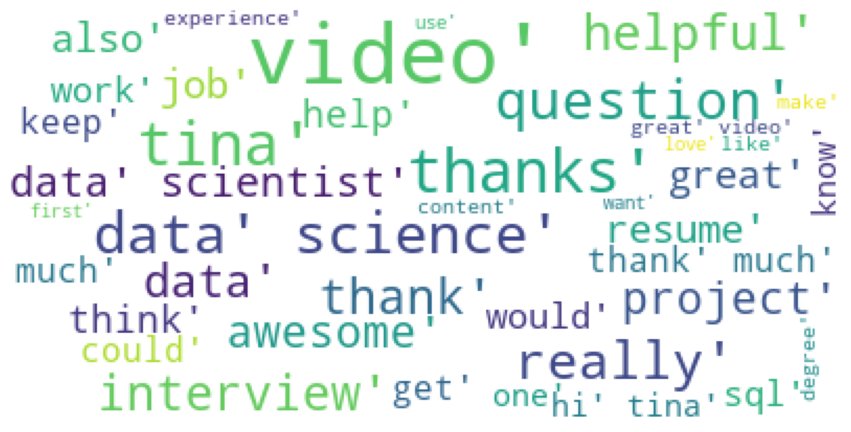

In [102]:
print_wordcloud(all_tina_question,max_words=40)

Is none


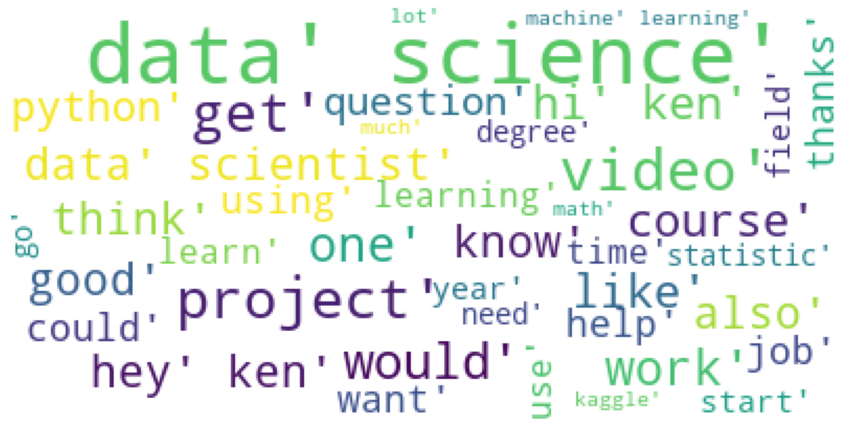

In [103]:
print_wordcloud(all_kenjee_question,max_words=40)

#### You know what I see there? DATA - SCIENCE - PROJECTS!! 
#### TIme to make your presenec ok kaggle felt, by created competition for both fun and practice :o)

#### And using hte #66daysofdata platform to help people work on kaggle challenge, organized by the youtubers .... that's good :o)

In [106]:
%run tina-kenjee-comments-nlp-script.ipynb

all done?!


You should consider upgrading via the 'c:\users\pascal\anaconda3\python.exe -m pip install --upgrade pip' command.


### 6. scatterplot for distances between tina & kenjee and other words

In [108]:
import multiprocessing

from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()

In [109]:
from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in data_kenjee_corr['clean_comment']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)

sentences = bigram[sent]

In [110]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab(sentences, progress_per=10000)

In [111]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(533799, 2842530)

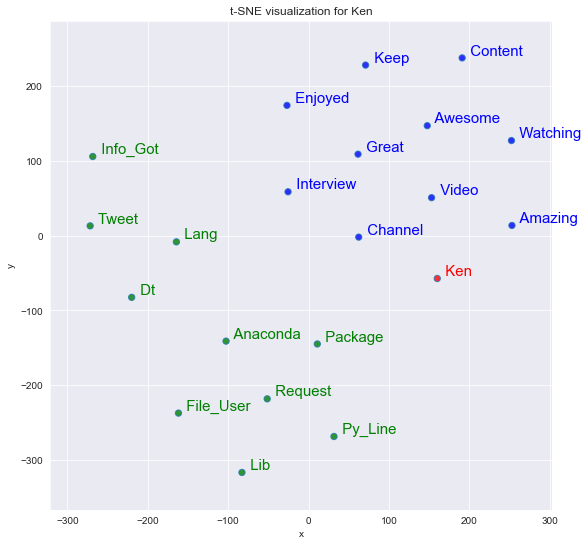

In [112]:
tsnescatterplot(w2v_model, 'ken', [i[0] for i in w2v_model.wv.most_similar(negative=["ken"])])

In [113]:
from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in data_tina_corr['clean_comment']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)

sentences = bigram[sent]

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)


(4486, 217980)

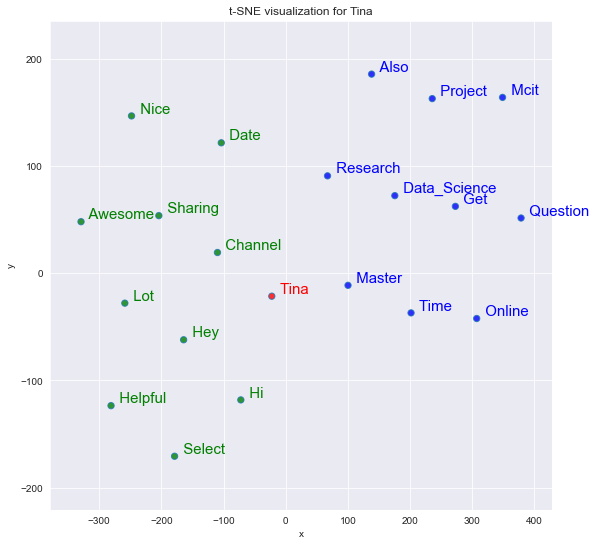

In [114]:
tsnescatterplot(w2v_model, 'tina', [i[0] for i in w2v_model.wv.most_similar(negative=["tina"])])

In [115]:
%run tina-kenjee-comments-nlp-script.ipynb

all done?!


You should consider upgrading via the 'c:\users\pascal\anaconda3\python.exe -m pip install --upgrade pip' command.


In [116]:
wv_ken_question = w2vec_model( data_kenjee_corr[data_kenjee_corr['is_question']>0]['clean_comment'])

NameError: name 'w2vec_model' is not defined

In [ ]:
import multiprocessing

from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()

from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in data_kenjee_corr[data_kenjee_corr['is_question'] >-1]['clean_comment']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)

sentences = bigram[sent]

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab(sentences, progress_per=10000)

In [ ]:
tsnescatterplot(w2v_model, 'ken', [i[0] for i in w2v_model.wv.most_similar(negative=["ken"])])

In [ ]:
sent = [row.split() for row in data_tina_corr[data_tina_corr['is_question'] >-1]['clean_comment']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)

sentences = bigram[sent]

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab(sentences, progress_per=10000)

In [ ]:
tsnescatterplot(w2v_model, 'tina', [i[0] for i in w2v_model.wv.most_similar(negative=["tina"])])

### 7. Conclusion
#### I honestly wish I could have told more about this, but i think I can do slightly better on the debate for president
#### same for the questions  part, that coud be more useful to the both of you.


### that's all for now folk but I'll come back with more in the future :o)